In [7]:
import numpy as np
from sklearn import preprocessing, neighbors
import pandas as pd
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?', -99999, inplace=True)
df.drop(['id'], 1, inplace=True)

In [9]:
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9714285714285714


In [16]:
example_measures = np.array([[4, 2, 1, 1, 1, 2, 3, 2, 1], [4, 2, 1, 2, 2, 2, 3, 2, 1]])
example_measures = example_measures.reshape(len(example_measures), -1)

prediction = clf.predict(example_measures)
print(prediction)

[2 2]


In [16]:
# KNN from scratch

import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
style.use('fivethirtyeight')

import pandas as pd
import random


In [17]:
# Euclidean Distance

plot1 = [1, 3]
plot2 = [2, 5]

euclidean_distance = sqrt((plot1[0] - plot2[0])**2 + (plot1[1] - plot2[1])**2)

print(euclidean_distance)

2.23606797749979


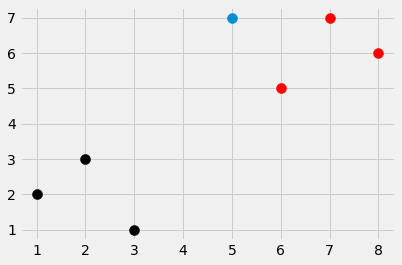

In [18]:
dataset = {'k':[[1, 2],[2, 3],[3, 1]], 'r':[[6,5], [7,7], [8,6]]}
new_features = [5,7]

for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0], ii[1], s=100, color=i)

plt.scatter(new_features[0], new_features[1], s=100)
plt.show()

In [81]:
def k_nearest_neighbors(data, predict, k):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups! IDIOT!')
    
    distances = []
    
    for group in data:
        for features in data[group]:
            
            #   euclidean_distance = sqrt((features[0] - predict[0])**2 + (features[1] - predict[1])**2) not fast, only for 2D
            #   euclidean_distance = np.sqrt(np.sum((np.array(features) - np.array(predict)) ** 2)) theres a simpler version

            euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict)) #faster
            distances.append([[euclidean_distance], [group]])
        
    votes = [i[1] for i in sorted(distances)[:k]]
    
    true_votes = []
    for i in votes:
        true_votes.append(i[0])
    
    print("true_votes", true_votes)
#     vote_result = Counter(true_votes).most_common(1)[0][0]

#     vote_result = Counter(votes).most_common(1)[0][0]
#     confidence = Counter(true_votes).most_common(1)[0][1] / k

    return "vote_result"

In [88]:
votes = [[4], [4], ["p"], ["u"], [4], [4], ["p"], ["y"], ["e"]]
true_votes = []
for i in votes:
    print(i)
    print(i[0])
    true_votes.append(i[0])



print(true_votes)
print(Counter(true_votes).most_common(1)[0][0])

[4]
4
[4]
4
['p']
p
['u']
u
[4]
4
[4]
4
['p']
p
['y']
y
['e']
e
[4, 4, 'p', 'u', 4, 4, 'p', 'y', 'e']
4


In [83]:
result = k_nearest_neighbors(dataset, new_features, 3)
print(result)

true_votes ['r', 'r', 'r']
vote_result


In [84]:
# applying KNN built from scratch

df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?', -99999, inplace=True)
df.drop(['id'], 1, inplace=True)

full_data = df.astype(float).values.tolist()

print(full_data[:10])

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0], [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0], [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0], [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0], [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0], [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0], [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0]]


In [85]:
random.shuffle(full_data)
print(full_data[:10])

[[5.0, 3.0, 4.0, 1.0, 8.0, 10.0, 4.0, 9.0, 1.0, 4.0], [8.0, 6.0, 7.0, 3.0, 3.0, 10.0, 3.0, 4.0, 2.0, 4.0], [1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0], [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0], [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [1.0, 1.0, 3.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0], [3.0, 3.0, 2.0, 6.0, 3.0, 3.0, 3.0, 5.0, 1.0, 2.0], [2.0, 1.0, 1.0, 1.0, 2.0, 5.0, 1.0, 1.0, 1.0, 2.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0], [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0]]


In [86]:
test_size = 0.2
train_set = {2: [], 4:[]}
test_set = {2: [], 4:[]}

train_data = full_data[:-(int)(test_size*len(full_data))]
test_data = full_data[-(int)(test_size*len(full_data)):]

for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [87]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k = 5)
        if group == vote:
            correct+=1
        total+=1
        
print("Accuracy: ", correct/total)

true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
true_votes [2, 2, 2, 2, 2]
t